# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [23]:
library ('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [24]:
library('ggrepel')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [25]:
measles = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
                  col_types =cols())

In [26]:
measles |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [27]:
# create the df_vacc_rates here
df_vacc_rates = measles |> 
    group_by(state) |>
    filter(mmr >= 0) |>
    summarize(min_fraction = min(mmr, na.rm = TRUE),
    obs = n(),
    n_above_95 = sum(mmr>95, na.rm = TRUE),
    frac_above_95 = sum(mmr>95, na.rm = TRUE) / n())

df_vacc_rates

state,min_fraction,obs,n_above_95,frac_above_95
<chr>,<dbl>,<int>,<int>,<dbl>
Arizona,15.38000,1171,581,0.496157131
Arkansas,17.21854,567,2,0.003527337
California,1.00000,14225,10398,0.730966608
Colorado,16.18000,1507,936,0.621101526
Connecticut,67.86000,589,475,0.806451613
Illinois,10.36585,7686,6889,0.896304970
Maine,38.46000,357,164,0.459383754
Massachusetts,3.00000,954,779,0.816561845
Minnesota,20.00000,1593,745,0.467671061


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [28]:
#install.packages('sqldf')
#library(sqldf)
#sqldf('select state from df_vacc_rates where min_fraction=min(min_fraction)')

df=as.data.frame(df_vacc_rates)
df[which(df$min_fraction==min(df$min_fraction)),1]

#df[2,]
#df[,1]

[1] "California" "Missouri"

In [7]:
# Answer: According to the table above, California and Missouri has the smallest fraction of schools above the CDC target vaccination rate of 95%.

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [29]:
nc_sum = measles |> filter(state=='North Carolina')

nc_sum

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,North Carolina,2018-19,A T Allen Elementary,NA,NA,Cabarrus,NA,132,-1,100,NA,NA,NA,35.36238,-80.51297
2,North Carolina,2018-19,A.C.E. Academy,NA,NA,Cabarrus,NA,44,-1,100,NA,NA,NA,35.30806,-80.67281
3,North Carolina,2018-19,ABC of NC Child Develop. Ctr,NA,NA,Davidson,NA,1,-1,100,NA,NA,NA,35.99481,-80.27403
4,North Carolina,2018-19,Agape Christian,NA,NA,Ashe,NA,3,-1,100,NA,NA,NA,36.42064,-81.48704
5,North Carolina,2018-19,Agape International Christian Academy,NA,NA,Franklin,NA,1,-1,100,NA,NA,NA,36.03484,-78.49820
6,North Carolina,2018-19,Ahoskie Christian,NA,NA,Hertford,NA,32,-1,100,NA,NA,NA,36.27857,-76.97674
7,North Carolina,2018-19,Alamance Christian,NA,NA,Alamance,NA,15,-1,100,NA,NA,NA,36.07537,-79.37108
8,North Carolina,2018-19,Alamance Elementary,NA,NA,Guilford,NA,79,-1,100,NA,NA,NA,36.01723,-79.70784
9,North Carolina,2018-19,Albemarle,NA,NA,Pasquotank,NA,15,-1,100,NA,NA,NA,36.27771,-76.28326


In [30]:
nc_sum$overall

[1] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
  [13] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
  [25] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
  [37] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
  [49] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
  [61] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
  [73] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
  [85] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
  [97] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [109] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [121] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [133] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [145] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [157] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [169] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [181] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [193] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [205] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [217] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [229] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [241] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [253] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [265] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [277] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [289] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [301] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [313] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [325] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [337] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [349] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [361] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [373] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [385] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [397] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [409] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [421] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [433] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [445] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [457] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [469] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [481] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [493] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [505] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [517] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [529] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [541] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [553] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [565] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [577] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [589] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
 [601] 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.

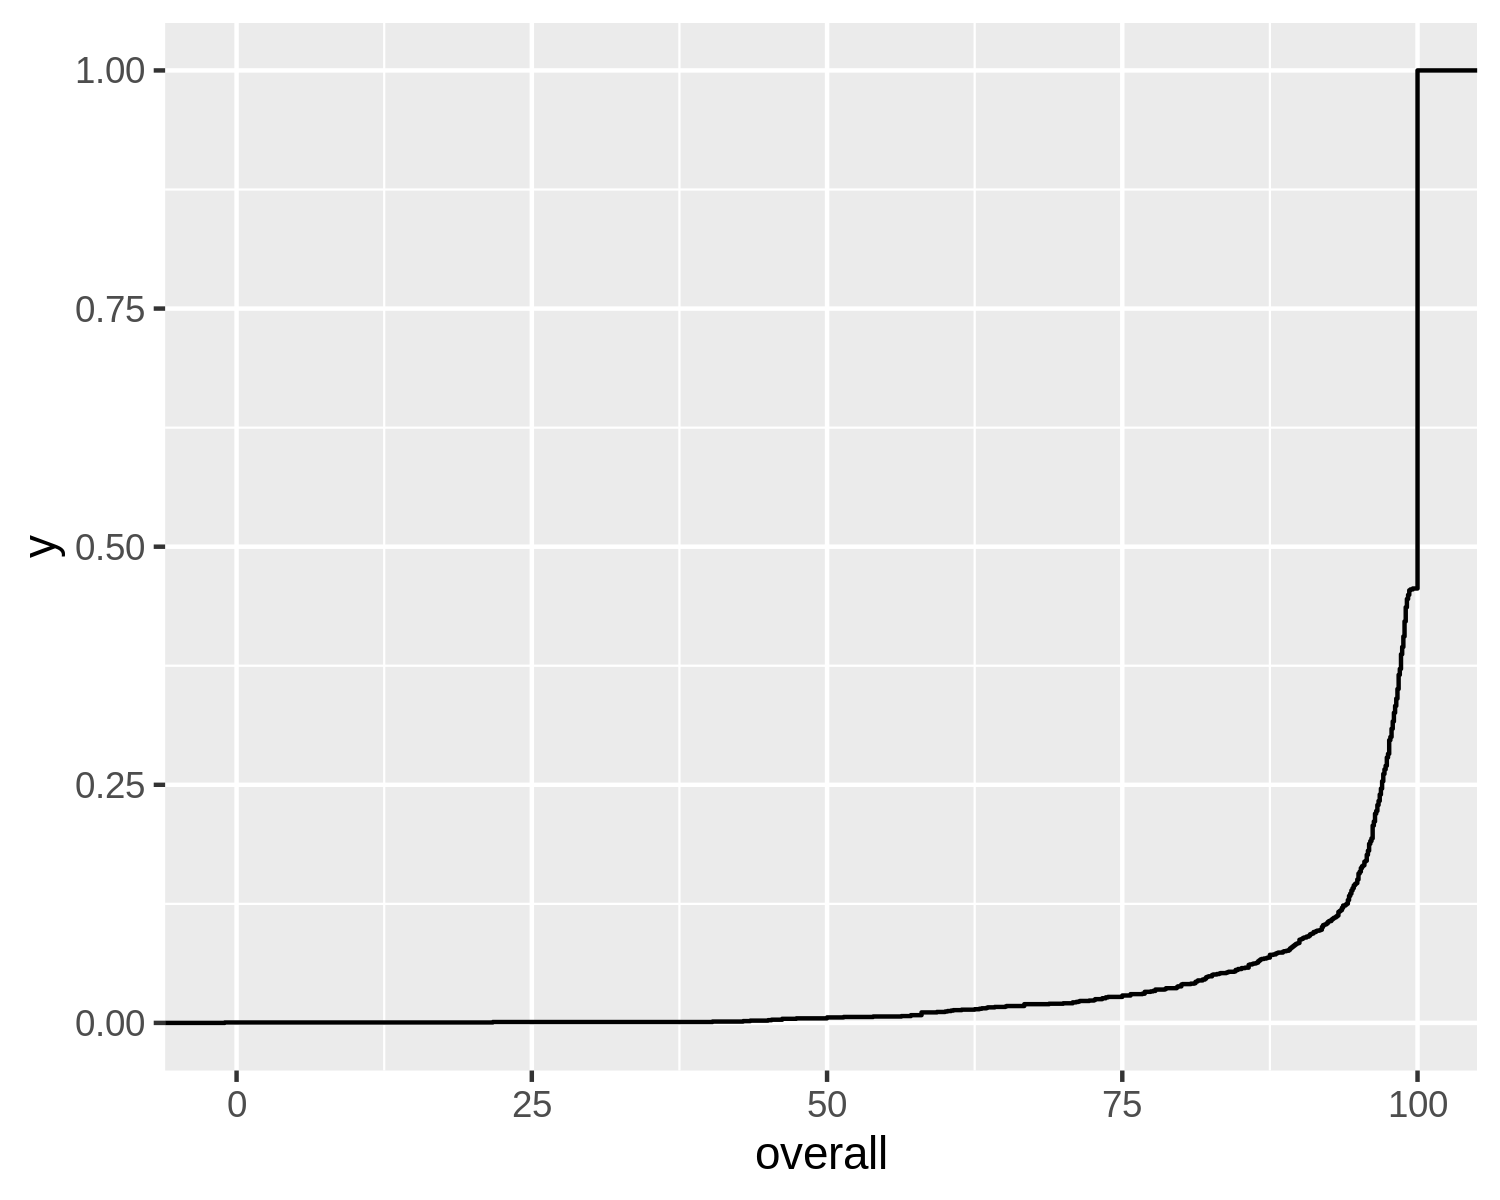

In [31]:
p = ggplot(nc_sum, aes(x=overall)) + stat_ecdf()

p

In [32]:
school_sum = nc_sum |>
    mutate(ypos = rank(overall, ties.method = 'first') / n()) |>
    select(`name`, overall, ypos) |>
    arrange(desc(ypos))

school_sum

name,overall,ypos
<chr>,<dbl>,<dbl>
Z.E.C.A. School of Arts and Technology,100,1.0000000
Youngsvil le Elementary,100,0.9995204
Youngsvil le Academy,100,0.9990408
Yates Mill Elementary,100,0.9985612
Yadkin Success Academy,100,0.9980815
Yadkin Path Montessori,100,0.9976019
WT Griggs Elementary,100,0.9971223
Wrightsvil le Beach Elem,100,0.9966427
Word of God Christian Academy,100,0.9961631


In [33]:
df=as.data.frame(school_sum)
df[which(df$overall==95),1]

[1] "The Mountain Community Sch"                  
 [2] "The Expedition"                              
 [3] "The Children's Vil lage Academy"             
 [4] "T C Henderson School of Science & Technology"
 [5] "Marion Elementary"                           
 [6] "Marion Elementary"                           
 [7] "Highland Elementary"                         
 [8] "Highland Elementary"                         
 [9] "Green Grove Elementary"                      
[10] "Glen Alpine Elementary"                      
[11] "Fayettevil le Street Elementary"             
[12] "Creswell Elementary"                         
[13] "Castle Hayne Elementary"

In [34]:
highlight = school_sum |> filter(`name` == 'Glen Alpine Elementary')

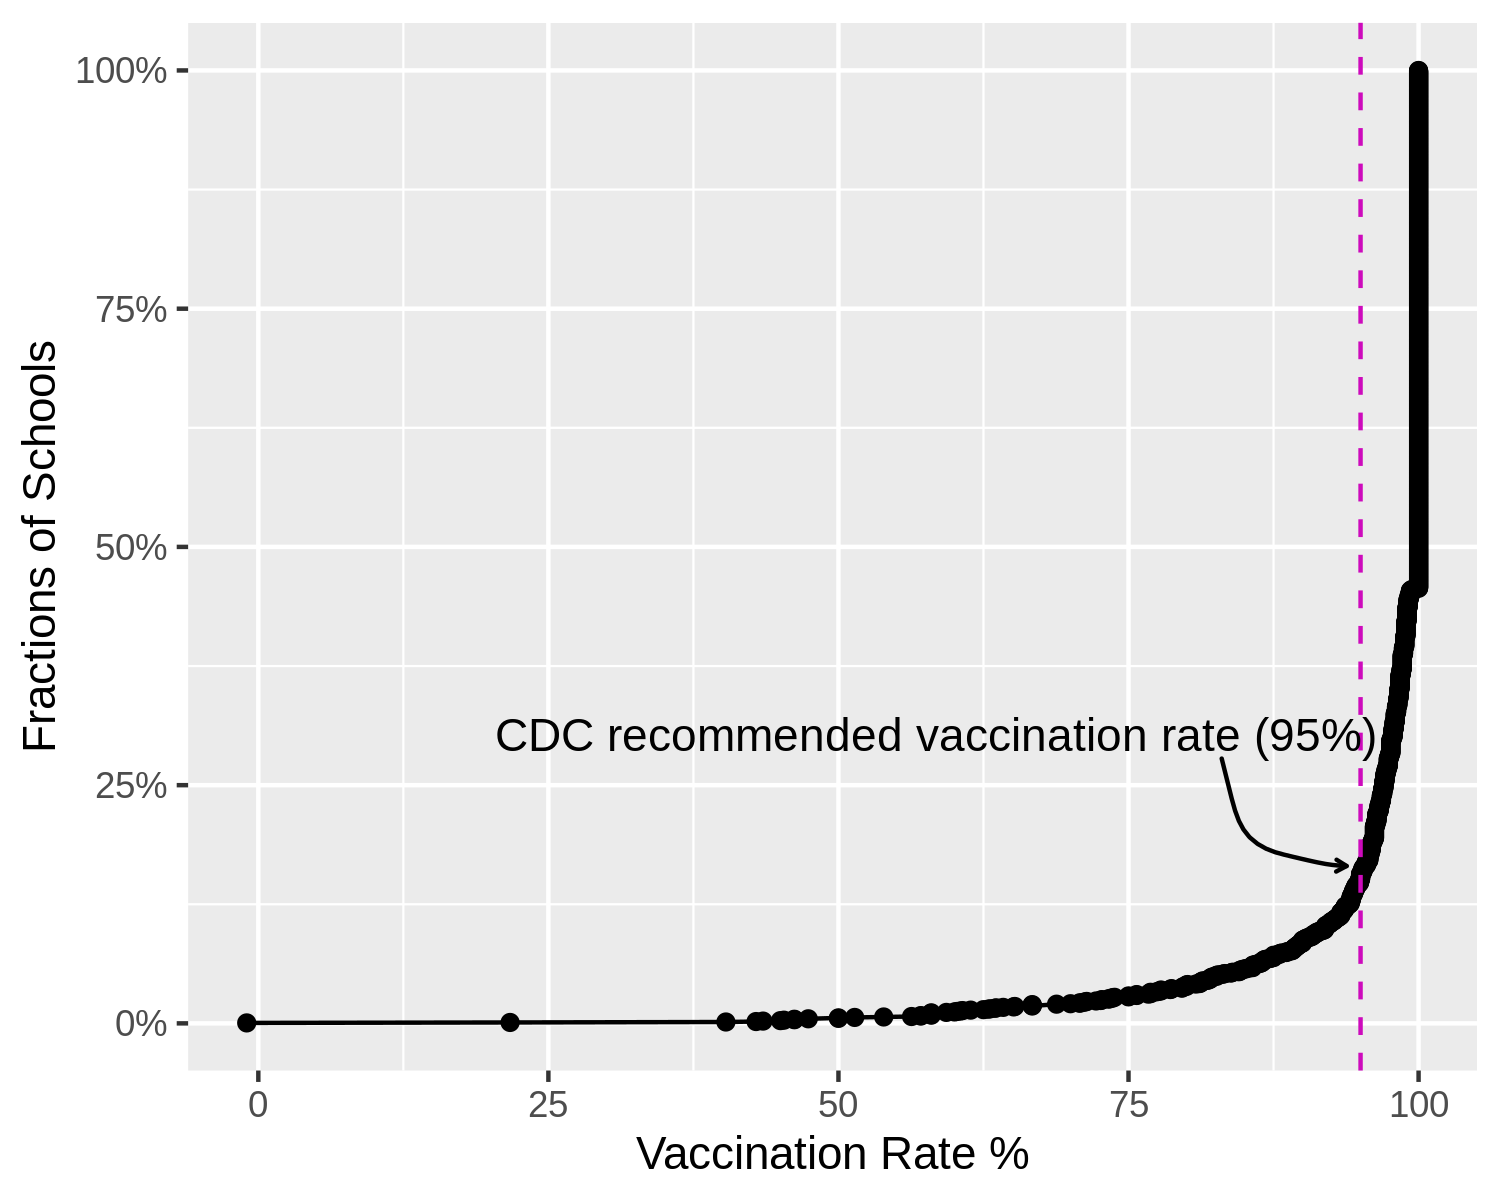

In [35]:
p = ggplot(school_sum, aes(x = overall, y = ypos)) + 
    geom_point() +
    geom_line() +
    scale_y_continuous(labels = scales::percent_format())+
    labs(x="Vaccination Rate %", y="Fractions of Schools")+ 
    geom_vline(xintercept=95, linetype=2, color='22')+
    geom_text_repel(
            data = highlight,
            mapping = aes(label = "CDC recommended vaccination rate (95%)"),
            hjust = 1,
            point.padding = 0.5,
            nudge_x = 0.15,
            nudge_y = 0.15,
            segment.curvature = 0.6,
            arrow = arrow(length = unit(1, "mm"))
            ) 
p

In [15]:
# (My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [39]:
median_rate = school_sum |>
    summarize(median.rate = median(overall))
              
median_rate

median.rate
<dbl>
100


In [ ]:
#Answer: Since the medianrate is 100 for NC, it is above the CDC recommended target of 95%.